In [1]:
import pylifted
import numpy as np
import matplotlib.pyplot as plt
import pywt
import functools

from pylifted import Wavelet, BoundaryCondition

In [2]:
n1 = 64
n1d = n1 // 2
n1s = n1 - n1d

n2 = 64
n2d = n2 // 2
n2s = n2 - n2d

e1 = np.arange(0, n1) + 1
e2 = (np.arange(0, n2) + 2.5)*10
E = e1[:, None] * e2
E.shape

(64, 64)

In [3]:
wvlt = 'db3'
e = np.zeros(50)
e[25] = 1.0
pylifted.lwt_forward(e, wavelet=wvlt, mode=BoundaryCondition.Reflect, axes=-1)

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.03522629, -0.13501102,  0.80689151,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.33267055,  0.4598775 , -0.08544127,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [4]:
pywt.Wavelet(wvlt).dec_lo, pywt.Wavelet(wvlt).dec_hi

([0.03522629188570953,
  -0.08544127388202666,
  -0.13501102001025458,
  0.45987750211849154,
  0.8068915093110925,
  0.33267055295008263],
 [-0.33267055295008263,
  0.8068915093110925,
  -0.45987750211849154,
  -0.13501102001025458,
  0.08544127388202666,
  0.03522629188570953])

In [5]:
n1, n2 = 1024, 1024
x = np.linspace(-10, 10, n1)
x2 = np.linspace(-10, 10, n2)
y = 1/(x**2 + 4)

y2 = 1/((x - 2)[:, None]**2 + (x2+3)**2 + 4)

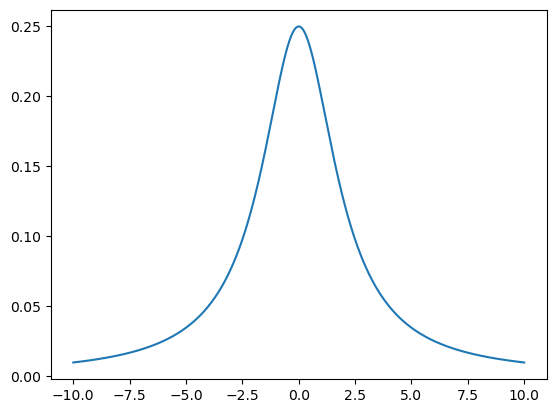

In [6]:
plt.plot(x, y)

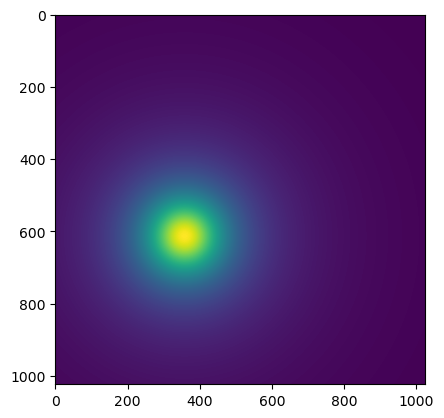

In [7]:
plt.imshow(y2)

In [8]:
wvlt = Wavelet.Daubechies3
mode = BoundaryCondition.Symmetric

yw = pylifted.lwt_forward(y, wavelet=wvlt, mode=mode, level=0)
yi_T = pylifted.lwt_inverse_adjoint(y, wavelet=wvlt, mode=mode, level=0)
y_r = pylifted.lwt_inverse(yw, wavelet=wvlt, mode=mode, level=0)

np.allclose(y, y_r), np.dot(yw, yi_T), np.dot(y, y)

(True, np.float64(10.01084080110062), np.float64(10.01084080110062))

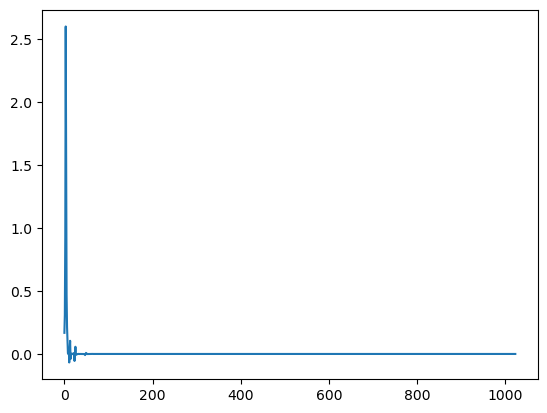

In [9]:
plt.plot(yw, label='db2')

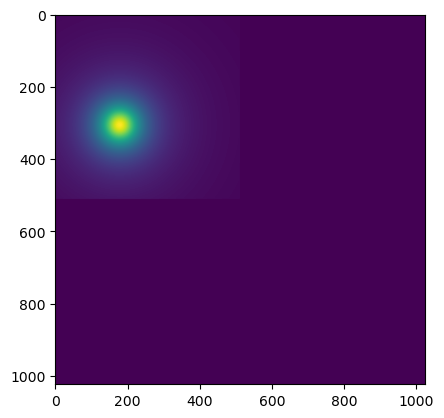

In [10]:
#wvlt = Wavelet.Bior2_8
lvl = 1

y2w = pylifted.lwt_forward(y2, wavelet=wvlt, mode=mode, level=lvl)
plt.imshow(y2w)

In [11]:
yw_IT = pylifted.lwt_inverse_adjoint(y2, wavelet=wvlt, mode=BoundaryCondition.Zero, level=lvl)
np.sum(y2w * yw_IT), np.sum(y2 * y2)

(np.float64(1974.8783750525286), np.float64(1974.9551740625564))

In [12]:
y2_r = pylifted.lwt_inverse(y2w, wavelet=wvlt, mode=mode, level=lvl)
np.allclose(y2, y2_r)

True

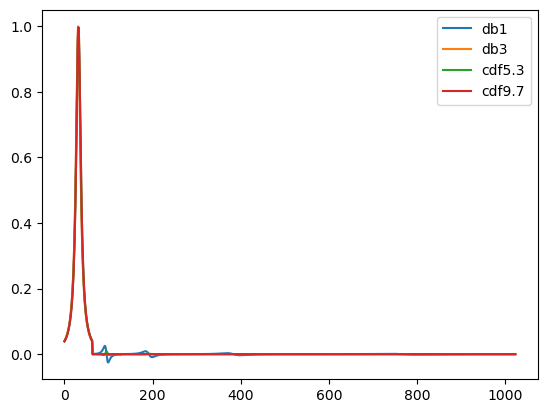

In [13]:
plt.plot(pylifted.lwt_forward(y, wavelet='db1', mode='Symmetric', level=4), label='db1')
#plt.plot(pylifted.lwt(y, wavelet='db2', mode='symmetric', level=1)[32:], label='db2')
#plt.plot(pylifted.lwt(y, wavelet='db3', mode='symmetric', level=1)[32:], label='db3')
plt.plot(pylifted.lwt_forward(y, wavelet='db3', mode='Symmetric', level=4), label='db3')


#plt.plot(pylifted.lwt(y, wavelet='bior4.2', mode='symmetric', level=1)[32:], label='bior4.2')
#plt.plot(pylifted.lwt_forward(y, wavelet='bior3.1', mode='symmetric', level=1)[32:], label='bior3.1')
plt.plot(pylifted.lwt_forward(y, wavelet='cdf5.3', mode='Symmetric', level=4), label='cdf5.3')
plt.plot(pylifted.lwt_forward(y, wavelet='cdf9.7', mode='Symmetric', level=4), label='cdf9.7')
plt.legend()

In [14]:
#y_lift = pylifted.lwt(y2, 'bior3.1', mode='reflect')
y_lift = pylifted.lwt_forward(y2, wavelet=Wavelet.CDF9_7, mode=mode, level=1)

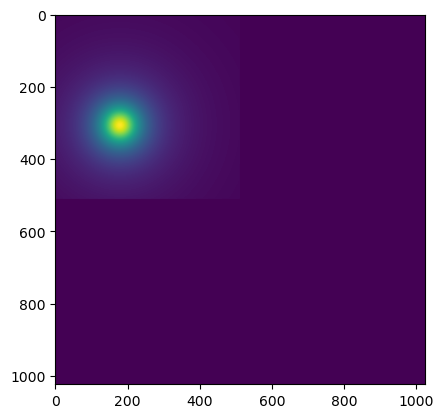

In [15]:
plt.imshow(y_lift)

In [16]:
y_lift.shape

(1024, 1024)

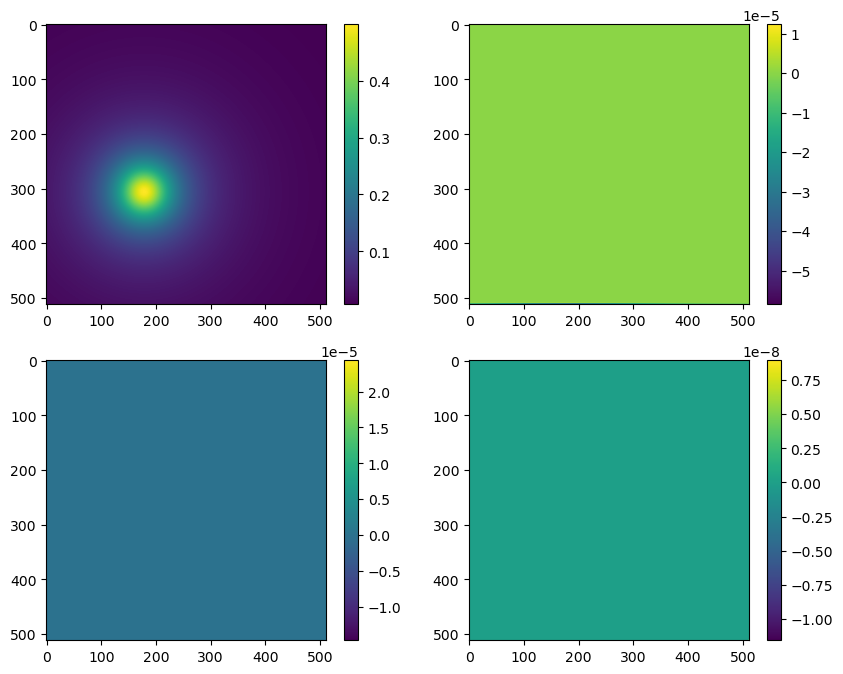

In [17]:
n1s = (n1 + 1) // 2
n2s = (n2 + 1) // 2
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(y_lift[:n1s, : n2s])
plt.colorbar()
plt.subplot(2, 2, 2)
plt.imshow(y_lift[n1s:, : n2s])
plt.colorbar()
plt.subplot(2, 2, 3)
plt.imshow(y_lift[:n1s, n2s:])
plt.colorbar()
plt.subplot(2, 2, 4)
plt.imshow(y_lift[n1s:, n2s:])
plt.colorbar()

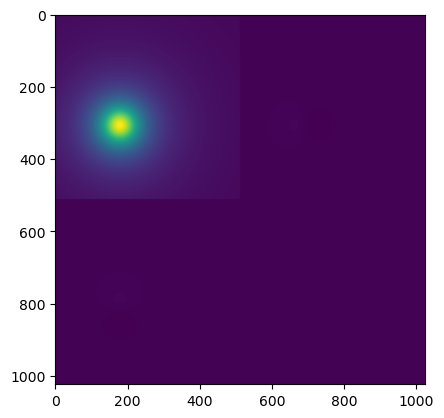

In [18]:
y2_w = pylifted.lwt_forward(y2, wavelet='bior3.5', mode=BoundaryCondition.Reflect, level=1)
y2_r = pylifted.lwt_inverse(y2_w, wavelet='bior3.5', mode=BoundaryCondition.Reflect, level=1)

plt.imshow(y2_w)

In [19]:
n1 = 24

u = np.random.rand(n1)
v = np.random.rand(n1)

wvlt = 'cdf5.3'
mode = BoundaryCondition.Zero
lvl = 1

func = functools.partial(pylifted.lwt_forward, wavelet=wvlt, mode=mode, level=lvl)
funcT = functools.partial(pylifted.lwt_forward_adjoint, wavelet=wvlt, mode=mode, level=lvl)
funcI = functools.partial(pylifted.lwt_inverse, wavelet=wvlt, mode=mode, level=lvl)
funcIT = functools.partial(pylifted.lwt_inverse_adjoint, wavelet=wvlt, mode=mode, level=lvl)

u_w = func(u)
u_r = funcI(u_w)
u_it = funcIT(u)
u_i = funcI(u)

v_t = funcT(v)
v_r = funcIT(v_t)
v_i = funcI(v)
v_it = funcIT(v)

print(f'Matching Forward/Inverse Normal:{np.allclose(u, u_r)}, Adjoint:{np.allclose(v, v_r)}')
print(f'|u|^2: {np.sum(u * u)}, u_w.dot(u_it): {np.sum(u_w * u_it)}')
print(f'|v|^2: {np.sum(v * v)}, v_t.dot(v_i): {np.sum(v_t * v_i)}')
print(f'v.dot(u): {np.sum(v * u)}, v_t.dot(u_i): {np.sum(v_t * u_i)}, u_w.dot(v_it): {np.sum(u_w * v_it)}')

Matching Forward/Inverse Normal:True, Adjoint:True
|u|^2: 9.793312925252984, u_w.dot(u_it): 9.793312925252984
|v|^2: 8.159855669775993, v_t.dot(v_i): 8.159855669775991
v.dot(u): 6.633391281152264, v_t.dot(u_i): 6.633391281152264, u_w.dot(v_it): 6.633391281152263


In [20]:
n1, n2 = 41, 41

u = np.random.rand(n1, n2)
v = np.random.rand(n1, n2)

wvlt = Wavelet.Lazy
mode = BoundaryCondition.Zero
lvl = 1

func = functools.partial(pylifted.lwt_forward, wavelet=wvlt, mode=mode, level=lvl)
funcT = functools.partial(pylifted.lwt_forward_adjoint, wavelet=wvlt, mode=mode, level=lvl)
funcI = functools.partial(pylifted.lwt_inverse, wavelet=wvlt, mode=mode, level=lvl)
funcIT = functools.partial(pylifted.lwt_inverse_adjoint, wavelet=wvlt, mode=mode, level=lvl)

u_w = func(u)
u_r = funcI(u_w)
u_it = funcIT(u)
u_i = funcI(u)

v_t = funcT(v)
v_r = funcIT(v_t)
v_i = funcI(v)
v_it = funcIT(v)

print(f'Matching Forward/Inverse Normal:{np.allclose(u, u_r)}, Adjoint:{np.allclose(v, v_r)}')
print(f'|u|^2: {np.sum(u * u)}, u_w.dot(u_it): {np.sum(u_w * u_it)}')
print(f'|v|^2: {np.sum(v * v)}, v_t.dot(v_i): {np.sum(v_t * v_i)}')
print(f'v.dot(u): {np.sum(v * u)}, v_t.dot(u_i): {np.sum(v_t * u_i)}, u_w.dot(v_it): {np.sum(u_w * v_it)}')

Matching Forward/Inverse Normal:True, Adjoint:True
|u|^2: 547.6967083455315, u_w.dot(u_it): 547.6967083455315
|v|^2: 567.3218237472232, v_t.dot(v_i): 567.3218237472232
v.dot(u): 414.9906546592699, v_t.dot(u_i): 414.99065465927, u_w.dot(v_it): 414.99065465927


In [21]:
n1, n2, n3 = 14, 23, 41

u = np.random.rand(n1, n2, n3)
v = np.random.rand(n1, n2, n3)

wvlt = 'cdf5.3'
mode = BoundaryCondition.Reflect
lvl = 1

func = functools.partial(pylifted.lwt_forward, wavelet=wvlt, mode=mode, level=lvl)
funcT = functools.partial(pylifted.lwt_forward_adjoint, wavelet=wvlt, mode=mode, level=lvl)
funcI = functools.partial(pylifted.lwt_inverse, wavelet=wvlt, mode=mode, level=lvl)
funcIT = functools.partial(pylifted.lwt_inverse_adjoint, wavelet=wvlt, mode=mode, level=lvl)

u_w = func(u)
u_r = funcI(u_w)
u_it = funcIT(u)
u_i = funcI(u)

v_t = funcT(v)
v_r = funcIT(v_t)
v_i = funcI(v)
v_it = funcIT(v)

print(f'Matching Forward/Inverse Normal:{np.allclose(u, u_r)}, Adjoint:{np.allclose(v, v_r)}')
print(f'|u|^2: {np.sum(u * u)}, u_w.dot(u_it): {np.sum(u_w * u_it)}')
print(f'|v|^2: {np.sum(v * v)}, v_t.dot(v_i): {np.sum(v_t * v_i)}')
print(f'v.dot(u): {np.sum(v * u)}, v_t.dot(u_i): {np.sum(v_t * u_i)}, u_w.dot(v_it): {np.sum(u_w * v_it)}')

Matching Forward/Inverse Normal:True, Adjoint:True
|u|^2: 4375.831029952647, u_w.dot(u_it): 4375.8310299526465
|v|^2: 4437.9286000728125, v_t.dot(v_i): 4437.9286000728125
v.dot(u): 3289.8957443771933, v_t.dot(u_i): 3289.8957443771933, u_w.dot(v_it): 3289.8957443771938


In [22]:
n1, n2, n3 = 14, 23, 41

u = np.random.rand(n1, n2, n3)
v = np.random.rand(n1, n2, n3)

v_dot_Fu = v.reshape(-1).dot(func(u, axes=(2, 0)).reshape(-1))
FTv_dot_u = funcT(v, axes=(2, 0)).reshape(-1).dot(u.reshape(-1))

v_dot_Fu, FTv_dot_u

(np.float64(1754.7787872425567), np.float64(1754.7787872425565))

In [23]:
out = np.empty_like(y2)

# Interleave, Deinterleave timings

In [56]:
%%timeit
pylifted.lwt_forward(y2, wavelet=Wavelet.Lazy, mode=BoundaryCondition.Periodic, out=out, axes=1)
#833 mu_s without contiguous simplificiation, then from without vec_ops 566 mu_s, then 323 after vec_ops on aligned input/output

319 μs ± 7.76 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [57]:
%%timeit
pylifted.lwt_forward(y2, wavelet=Wavelet.Lazy, mode=BoundaryCondition.Periodic, out=out, axes=0)
#From before 1.73ms without vec_op, then:

1.4 ms ± 15 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [32]:
%%timeit
pylifted.lwt_forward(y2, wavelet=Wavelet.Lazy, mode=BoundaryCondition.Periodic, out=out)

1.94 ms ± 78.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [34]:
%%timeit
pylifted.lwt_inverse(y2, wavelet=Wavelet.Lazy, mode=BoundaryCondition.Periodic, out=out, axes=1)

582 μs ± 42.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [35]:
%%timeit
pylifted.lwt_inverse(y2, wavelet=Wavelet.Lazy, mode=BoundaryCondition.Periodic, out=out, axes=0)

1.72 ms ± 49.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [36]:
%%timeit
pylifted.lwt_inverse(y2, wavelet=Wavelet.Lazy, mode=BoundaryCondition.Periodic, out=out)

2.09 ms ± 192 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Daubechies 3

In [24]:
%%timeit
pylifted.lwt_forward(y2, wavelet=Wavelet.Daubechies3, mode=BoundaryCondition.Periodic, out=out, axes=0)
# with compilation dependant BC: 1.84 ms, basically the same with the switch statement BC, great!

1.58 ms ± 31.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [25]:
%%timeit
pylifted.lwt_forward(y2, wavelet=Wavelet.Daubechies3, mode=BoundaryCondition.Periodic, out=out, axes=1)
# was about 717 before...

639 μs ± 8.74 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [26]:
%%timeit
pylifted.lwt_forward(y2, wavelet=Wavelet.Daubechies3, mode=BoundaryCondition.Periodic, out=out)

2.28 ms ± 115 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
%%timeit
pylifted.lwt_forward(y2, wavelet=Wavelet.Daubechies3, mode=BoundaryCondition.Periodic, out=out, n_threads=16)

436 μs ± 9.15 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [46]:
%%timeit
pylifted.lwt_forward(y2, wavelet=Wavelet.Daubechies10, mode=BoundaryCondition.Periodic, out=out)

3.98 ms ± 339 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [53]:
%%timeit
pylifted.lwt_forward(y2, wavelet=Wavelet.Daubechies3, mode=BoundaryCondition.Periodic, n_threads=16, level=1, axes=1)

1.38 ms ± 18.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [31]:
%%timeit
pylifted.lwt(y2, wavelet='db6', mode='periodic', level=1, n_threads=1)

8.04 ms ± 458 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%%timeit
pylifted.lwt(y2, wavelet='db5', mode='reflect', level=1, n_threads=16)

4.13 ms ± 82.9 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%%timeit
pywt.dwt(y2, 'db3', mode='per', axis=1)

3.06 ms ± 373 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
%%timeit
pywt.dwt(y2, 'db3', mode='per', axis=0)

15.3 ms ± 830 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [47]:
%%timeit
pywt.dwt2(y2, 'db10', mode='per')

27.8 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:
%%timeit
pylifted.lwt(y2, wavelet='db5', mode='reflect', level=(3, 3), n_threads=16)

4.49 ms ± 99.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
pywt.Wavelet('bior1.0')

ValueError: Unknown wavelet name 'bior1.0', check wavelist() for the list of available builtin wavelets.

In [49]:
pywt.wavelist(kind='discrete')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

In [48]:
biors = ['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
]

wt = pywt.Wavelet(biors[1])
wt.dec_hi, wt.dec_lo

([-0.0, 0.0, -0.7071067811865476, 0.7071067811865476, -0.0, 0.0],
 [-0.08838834764831845,
  0.08838834764831845,
  0.7071067811865476,
  0.7071067811865476,
  0.08838834764831845,
  -0.08838834764831845])